## Building a Distance estimation model using Neural Networks

Features - xmin, ymin, xmax, ymax from kitti dataset for each object

Labels - z (distance from camera) for each object

Dataset - KITTI Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('annotations.txt')

In [3]:
df.head()

,filename,class,truncated,occluded,observation angle,xmin,ymin,xmax,ymax,height,width,length,xloc,yloc,zloc,rot_y
0,000000.txt,Pedestrian,0.0,0,-0.20,712.40,143.00,810.73,307.92,1.89,0.48,1.20,1.84,1.47,8.41,0.01
1,000001.txt,Truck,0.0,0,-1.57,599.41,156.40,629.75,189.25,2.85,2.63,12.34,0.47,1.49,69.44,-1.56
2,000001.txt,Car,0.0,0,1.85,387.63,181.54,423.81,203.12,1.67,1.87,3.69,-16.53,2.39,58.49,1.57
3,000001.txt,Cyclist,0.0,3,-1.65,676.60,163.95,688.98,193.93,1.86,0.60,2.02,4.59,1.32,45.84,-1.55
4,000002.txt,Misc,0.0,0,-1.82,804.79,167.34,995.43,327.94,1.63,1.48,2.37,3.23,1.59,8.55,-1.47


In [4]:
columnsX = ['xmin', 'ymin', 'xmax', 'ymax']
columnsY = ['zloc']

In [5]:
X_data = df[columnsX]
y_data = df[columnsY]

In [6]:
X_data.head()

,xmin,ymin,xmax,ymax
0,712.40,143.00,810.73,307.92
1,599.41,156.40,629.75,189.25
2,387.63,181.54,423.81,203.12
3,676.60,163.95,688.98,193.93
4,804.79,167.34,995.43,327.94


In [7]:
y_data.head()

,zloc
0,8.41
1,69.44
2,58.49
3,45.84
4,8.55


In [8]:
X_data.shape

(40570, 4)

Net(
  (fc1): Linear(in_features=4, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (bn4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
)
MSE: 1077.6213, MAE: 27.8005, MAP: 27.3008, RMSE: 32.8271,
MSE: 975.4023, MAE: 26.2400, MAP: 25.7406, RMSE: 31.2314,
MSE: 877.5674, MAE: 24.4297, MAP: 23.932

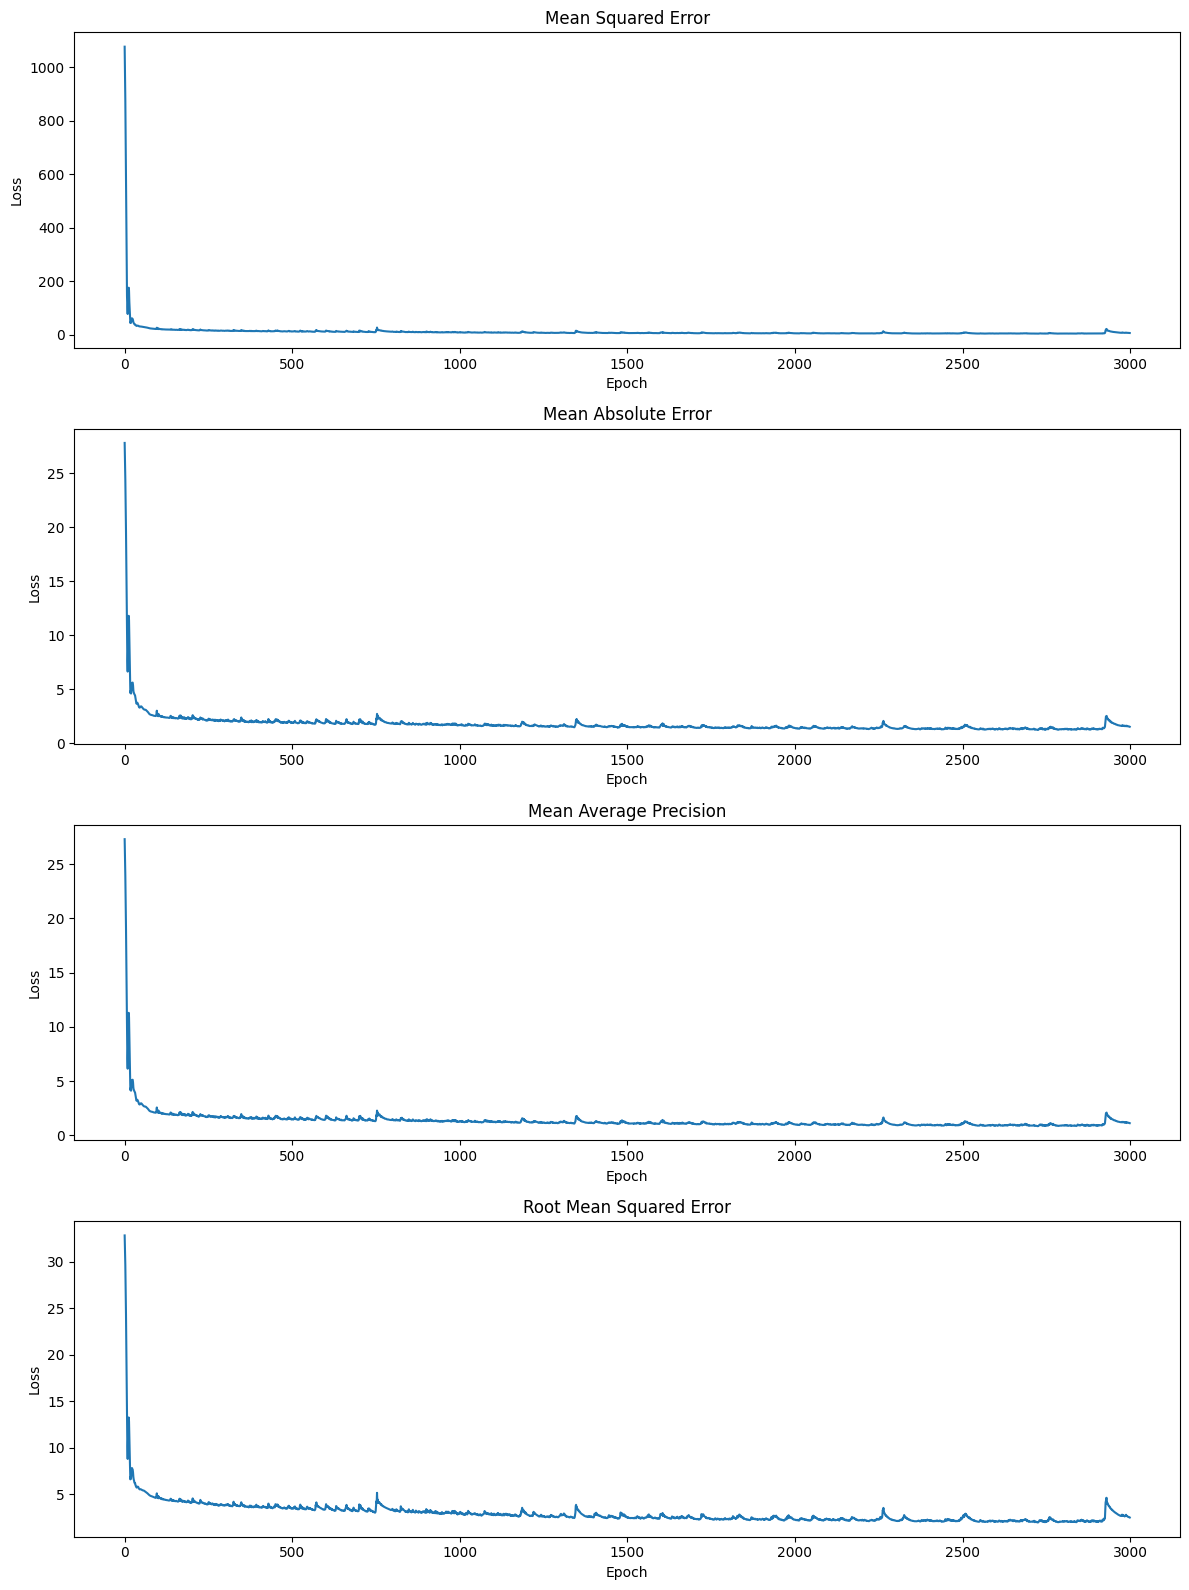

MSE: 6.2650, RMSE: 3.1379, MAE: 1.7832, MAP: 1.3826


In [9]:
# Importing necessary libraries
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(np.array(X_data), np.array(y_data), test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
x_test = torch.tensor(x_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

# Define the neural net architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 256)     # Fully connected layer with 4 input features and 256 output features
        self.bn1 = nn.BatchNorm1d(256)   # Batch normalization layer with 256 input features
        self.dropout1 = nn.Dropout(p=0.5) # Dropout layer with dropout probability of 0.5
        self.fc2 = nn.Linear(256, 128)   # Fully connected layer with 256 input features and 128 output features
        self.bn2 = nn.BatchNorm1d(128)   # Batch normalization layer with 128 input features
        self.dropout2 = nn.Dropout(p=0.5) # Dropout layer with dropout probability of 0.5
        self.fc3 = nn.Linear(128, 64)    # Fully connected layer with 128 input features and 64 output features
        self.bn3 = nn.BatchNorm1d(64)    # Batch normalization layer with 64 input features
        self.dropout3 = nn.Dropout(p=0.5) # Dropout layer with dropout probability of 0.5
        self.fc4 = nn.Linear(64, 32)     # Fully connected layer with 64 input features and 32 output features
        self.bn4 = nn.BatchNorm1d(32)    # Batch normalization layer with 32 input features
        self.dropout4 = nn.Dropout(p=0.5) # Dropout layer with dropout probability of 0.5
        self.fc5 = nn.Linear(32, 1)      # Fully connected layer with 32 input features and 1 output feature

    def forward(self, x):
        # Pass the input through the neural network layers
        x = nn.functional.relu(self.bn1(self.fc1(x)))
        # x = self.dropout1(x)
        x = nn.functional.relu(self.bn2(self.fc2(x)))
        # x = self.dropout2(x)
        x = nn.functional.relu(self.bn3(self.fc3(x)))
        # x = self.dropout3(x)
        x = nn.functional.relu(self.bn4(self.fc4(x)))
        # x = self.dropout4(x)
        x = self.fc5(x)
        return x


# Define the loss functions to use
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
criterion_map = nn.SmoothL1Loss()

# Train the model
model = Net()                       # Initialize the neural net
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Use Adam optimizer with learning rate of 0.1

print(model)

num_epochs = 3000   # Set the number of epochs
losses_mse = []
losses_mae = []
losses_map = []
losses_rmse = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(x_train)
    loss_mse = criterion_mse(output, y_train)
    loss_mae = criterion_mae(output, y_train)
    loss_map = criterion_map(output, y_train)
    loss_rmse = torch.sqrt(loss_mse) # Calculate RMSE
    loss = loss_mse + loss_mae + loss_map + loss_mse
    loss.backward()
    optimizer.step()
    
    # Record losses at each epoch
    losses_mse.append(loss_mse.item())
    losses_mae.append(loss_mae.item())
    losses_map.append(loss_map.item())
    losses_rmse.append(loss_rmse.item())
    
    print(f"MSE: {loss_mse.item():.4f}, MAE: {loss_mae.item():.4f}, MAP: {loss_map.item():.4f}, RMSE: {loss_rmse.item():.4f},")

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

# Plot MSE
axs[0].plot(losses_mse, label="MSE")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].set_title("Mean Squared Error")

# Plot MAE
axs[1].plot(losses_mae, label="MAE")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].set_title("Mean Absolute Error")

# Plot MAP
axs[2].plot(losses_map, label="MAP")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Loss")
axs[2].set_title("Mean Average Precision")

# Plot RMSE
axs[3].plot(losses_rmse, label="RMSE")
axs[3].set_xlabel("Epoch")
axs[3].set_ylabel("Loss")
axs[3].set_title("Root Mean Squared Error")

# Show plots
plt.tight_layout()
plt.show()

# Evaluate the model
with torch.no_grad():
    output = model(x_test)
    rmse = torch.sqrt(criterion_mse(output, y_test))
    mae = criterion_mae(output, y_test)
    map = criterion_map(output, y_test)

print(f"MSE: {loss_mse.item():.4f}, RMSE: {rmse.item():.4f}, MAE: {mae.item():.4f}, MAP: {map.item():.4f}")




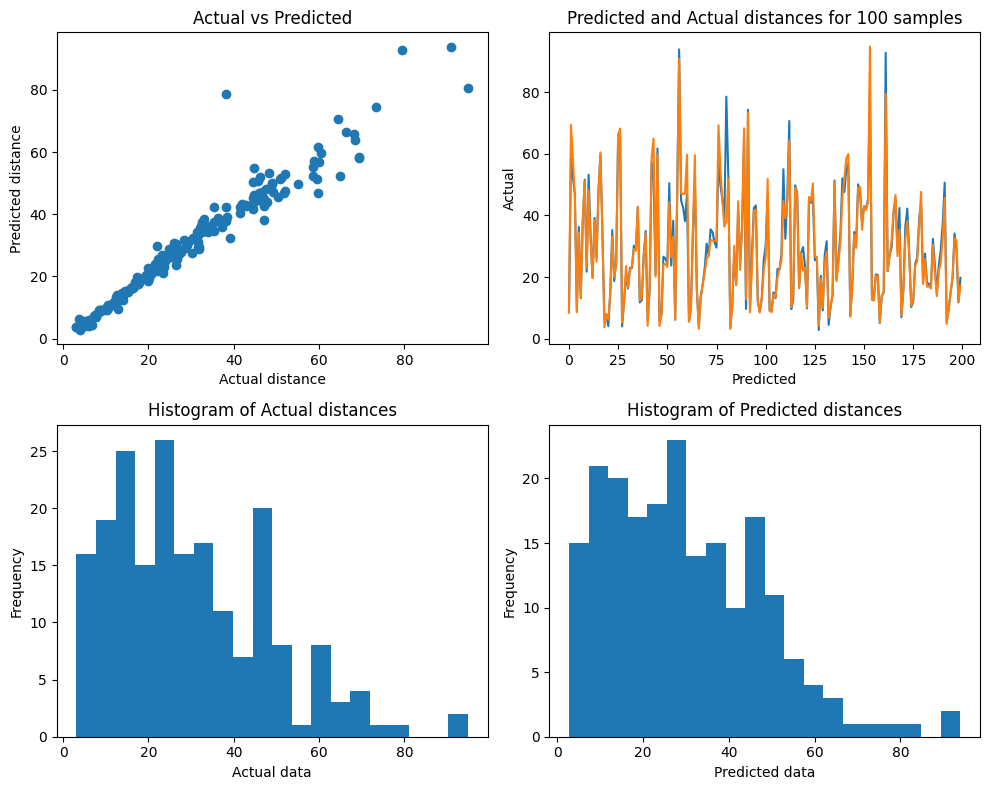

In [16]:
model.eval()

# Get model predictions
x_new = torch.tensor(np.array(X_data[:200]), dtype=torch.float)
y_pred = model(x_new).detach().numpy().flatten()

# Get ground truth values
y_data = np.array(y_data)[:200]

# Calculate errors
errors = y_pred - y_data

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of predicted vs actual values
axs[0, 0].scatter(y_data, y_pred)
axs[0, 0].set_xlabel('Actual distance')
axs[0, 0].set_ylabel('Predicted distance')
axs[0, 0].set_title('Actual vs Predicted')

# Scatter plot of predicted vs errors
axs[0, 1].plot(y_pred) 
axs[0, 1].plot(y_data)
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Actual')
axs[0, 1].set_title('Predicted and Actual distances for 100 samples')

# Histogram of errors
axs[1, 0].hist(y_data, bins=20)
axs[1, 0].set_xlabel('Actual data')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Actual distances')

# Histogram of predicted values
axs[1, 1].hist(y_pred, bins=20)
axs[1, 1].set_xlabel('Predicted data')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Predicted distances')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
model.eval()

x_new = torch.tensor(np.array(X_data[:200]), dtype=torch.float)


# Make predictions
y_pred = model(x_new)
y_pred = y_pred.detach().numpy()
y_data = np.array(y_data)
# Print the predictions
list_a = []
list_b = []
for i in range(100):
    print(y_pred[i], end="--->")
    list_a.append(float(y_pred[i]))
    print(y_data[i])
    list_b.append(float(y_data[i]))

[8.586409]--->[8.41]
[58.465027]--->[69.44]
[52.427418]--->[58.49]
[46.855682]--->[45.84]
[9.213392]--->[8.55]
[36.290005]--->[34.38]
[13.114145]--->[13.22]
[37.938103]--->[38.26]
[51.609013]--->[51.17]
[21.72643]--->[23.02]
[53.256413]--->[48.22]
[33.26666]--->[31.73]
[19.772966]--->[19.72]
[39.191902]--->[38.44]
[26.333214]--->[25.01]
[48.015774]--->[47.55]
[59.760567]--->[60.52]
[34.462116]--->[34.09]
[6.186985]--->[3.68]
[7.900446]--->[7.86]
[4.0510316]--->[6.15]
[15.264139]--->[14.44]
[35.23644]--->[33.2]
[18.675106]--->[19.96]
[25.035124]--->[23.88]
[66.37558]--->[66.37]
[65.95044]--->[68.25]
[3.9568043]--->[5.2]
[11.61431]--->[11.8]
[21.11407]--->[23.51]
[16.218557]--->[16.5]
[23.027998]--->[22.05]
[22.925901]--->[23.64]
[30.193663]--->[29.07]
[29.067907]--->[28.53]
[42.798946]--->[42.85]
[11.737463]--->[12.42]
[12.527695]--->[13.43]
[27.1303]--->[26.64]
[34.944088]--->[34.08]
[5.556096]--->[4.13]
[16.262638]--->[15.95]
[57.174458]--->[58.84]
[52.31195]--->[65.02]
[20.79347]--->

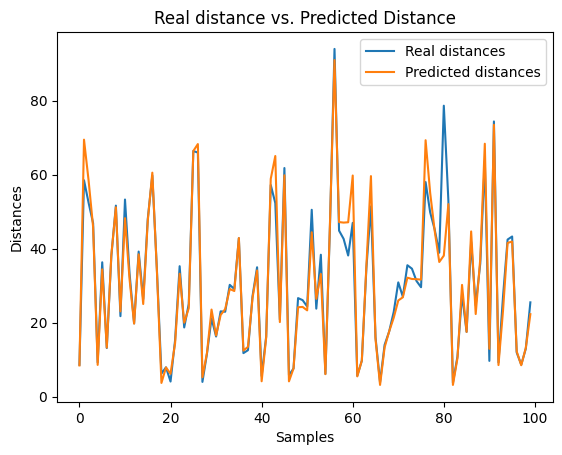

In [18]:
# Plot the comparison between real and predicted distances
plt.plot(list_a, label='Real distances')
plt.plot(list_b, label='Predicted distances')
plt.ylabel('Distances')
plt.xlabel('Samples')
plt.title('Real distance vs. Predicted Distance')
plt.legend()
plt.show()


In [19]:
# Save the model and optimizer states to files
torch.save(model, 'distance_model2.pt')

In [20]:
# Initialize the optimizer
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'model_checkpoint.pth')


In [21]:
# Importing necessary libraries
import pickle


with open("model2.pkl", "wb") as f:
    pickle.dump(model, f)
